<a href="https://colab.research.google.com/github/arjun713/Automatic-leaf-infection-identifier/blob/master/Developing_LSTM_Models_For_Univariate_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:

print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [ ]:
X.shape

(6, 3)

In [ ]:


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))




Building LSTM Model

In [ ]:


# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)



Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 33709.1758
Epoch 2/300
1/1 [==============================] - 0s 7ms/step - loss: 33397.0664
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 33092.2695
Epoch 4/300
1/1 [==============================] - 0s 8ms/step - loss: 32772.0625
Epoch 5/300
1/1 [==============================] - 0s 5ms/step - loss: 32429.9766
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 32062.2969
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 31645.2754
Epoch 8/300
1/1 [==============================] - 0s 4ms/step - loss: 31145.1855
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 30513.2734
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 29805.2969
Epoch 11/300
1/1 [==============================] - 0s 8ms/step - loss: 29099.1777
Epoch 12/300
1/1 [==============================] - 0s 9ms/step - loss: 28416.2598
Epoch 13/300
1


Predicting For the next 10 data


In [ ]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input= np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[226.53856]
1 day input [196.         210.         226.53855896]
1 day output [[236.51779]]
2 day input [210.         226.53855896 236.51779175]
2 day output [[250.95737]]
3 day input [226.53856 236.51779 250.95737]
3 day output [[267.21735]]
4 day input [236.51779 250.95737 267.21735]
4 day output [[279.73462]]
5 day input [250.95737 267.21735 279.73462]
5 day output [[295.6571]]
6 day input [267.21735 279.73462 295.6571 ]
6 day output [[312.46304]]
7 day input [279.73462 295.6571  312.46304]
7 day output [[327.891]]
8 day input [295.6571  312.46304 327.891  ]
8 day output [[345.77017]]
9 day input [312.46304 327.891   345.77017]
9 day output [[364.24387]]
[226.53856, 236.51779, 250.95737, 267.21735, 279.73462, 295.6571, 312.46304, 327.891, 345.77017, 364.24387]


In [ ]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [ ]:
len(timeseries_data)

9

In [ ]:
lst_output


[226.53856,
 236.51779,
 250.95737,
 267.21735,
 279.73462,
 295.6571,
 312.46304,
 327.891,
 345.77017,
 364.24387]


Visualizaing The Output

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

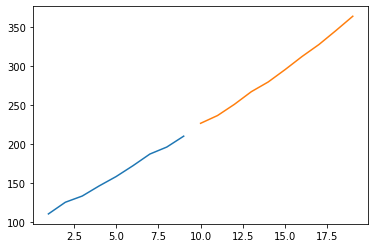

In [ ]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)